In [44]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from util import training, ElmanRNN, JordanRNN, MultiRecurrentNN

def preprocess(data):
    print(data.shape)
    print(data['UDI'].nunique())
    print(data['Product ID'].nunique())
    data = data.drop(columns=['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
    data.rename(columns={'Air temperature [K]': 'AirTemp',
                         'Process temperature [K]': 'ProcessTemp',
                         'Rotational speed [rpm]': 'RotationalSpeed',
                         'Torque [Nm]': 'Torque',
                         'Tool wear [min]': 'ToolWear',
                         'Machine failure': 'MachineFailure'}, inplace=True)
    # convert to dummies
    data = pd.get_dummies(data, columns=['Type'], drop_first=False).astype(int)
    data['MachineFailure'] = data['MachineFailure'].astype(int)

    data['LogRotationalSpeed'] = np.log(data['RotationalSpeed'] + 1)
    data['LogTorque'] = np.log(data['Torque'] + 1)

    data.drop(columns=['RotationalSpeed', 'Torque'], inplace=True)


    return data

# Read in the data

data = pd.read_csv('../csvs/ai4i2020.csv')
data = preprocess(data)
data.head(n=100)

(10000, 14)
10000
10000


,AirTemp,ProcessTemp,ToolWear,MachineFailure,Type_H,Type_L,Type_M,LogRotationalSpeed,LogTorque
0,298,308,0,0,0,0,1,7.347300,3.761200
1,298,308,3,0,0,1,0,7.250636,3.850148
2,298,308,5,0,0,1,0,7.312553,3.912023
3,298,308,7,0,0,1,0,7.268223,3.688879
4,298,308,9,0,0,1,0,7.250636,3.713572
...,...,...,...,...,...,...,...,...,...
95,299,309,44,0,0,0,1,7.209340,3.970292
96,299,309,47,0,0,0,1,7.362645,3.583519
97,298,308,50,0,0,0,1,7.467942,3.401197
98,298,308,53,0,0,1,0,7.333023,3.496508


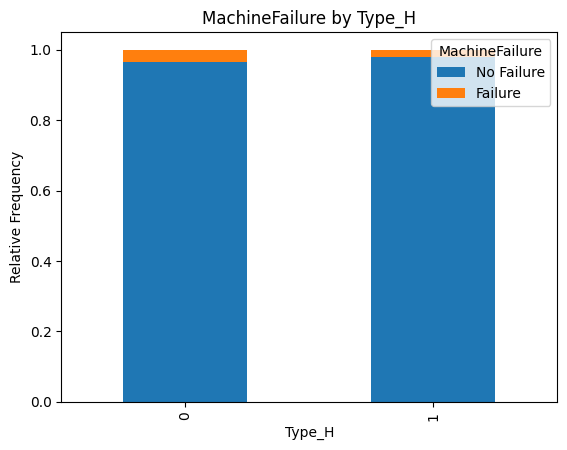

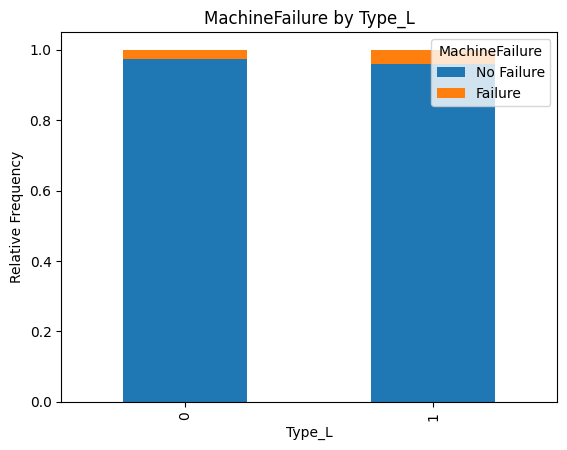

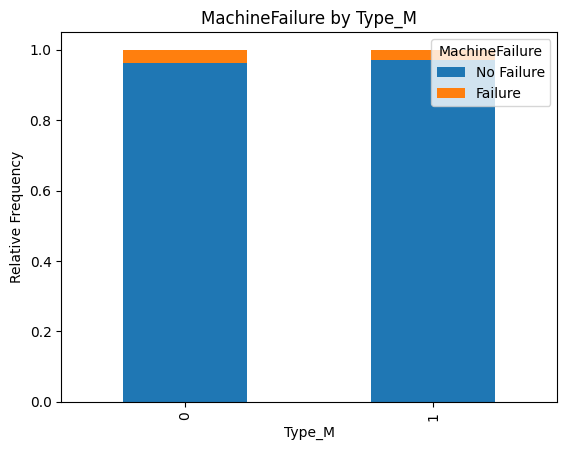

In [ ]:
def plot_crosstab(df, bool_col1, target_boolean_feature):
    cross_tab = pd.crosstab(df[bool_col1], df[target_boolean_feature], normalize='index')
    
    
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{target_boolean_feature} by {bool_col1}')
    
    plt.xlabel(bool_col1)
    plt.ylabel('Relative Frequency')
    
    plt.legend(title=target_boolean_feature, loc='upper right', labels=['No Failure', 'Failure'])
    
    plt.show()

plot_crosstab(data, 'Type_H', 'MachineFailure')
plot_crosstab(data, 'Type_L', 'MachineFailure')
plot_crosstab(data, 'Type_M', 'MachineFailure')

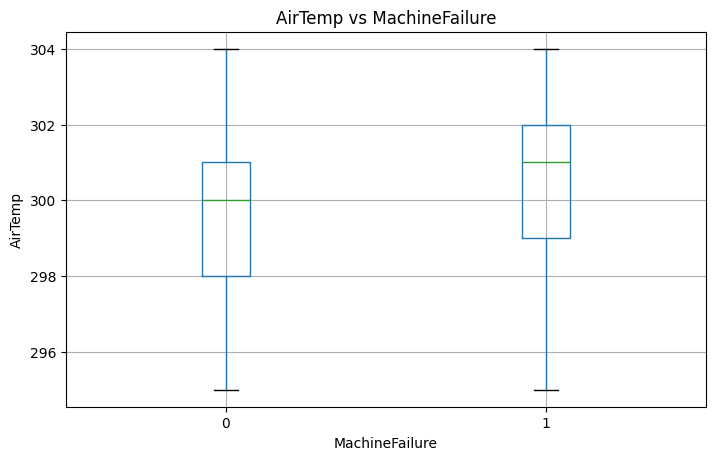

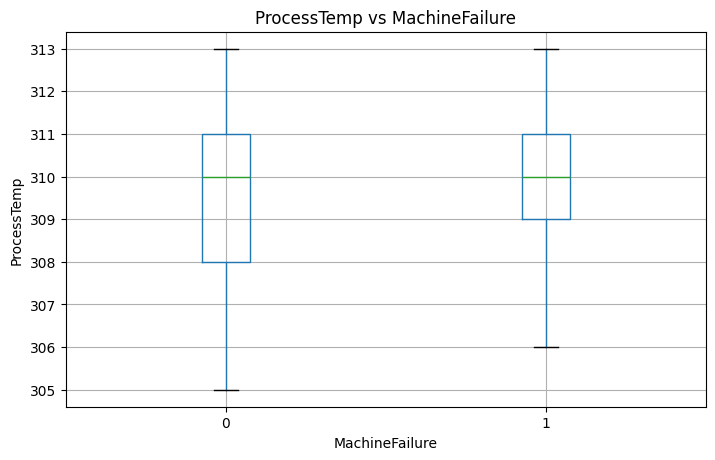

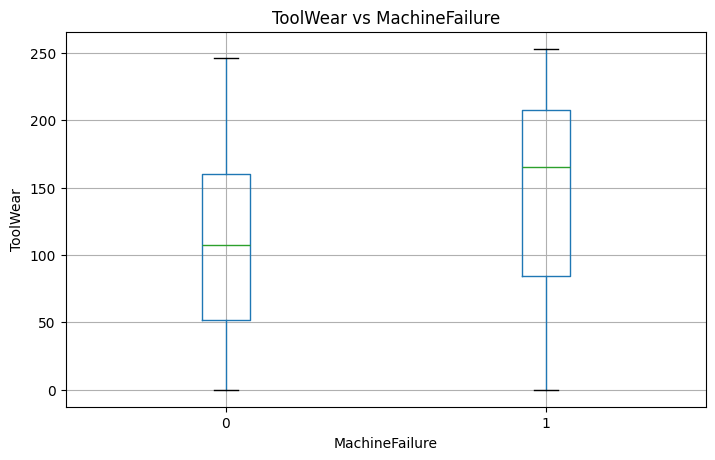

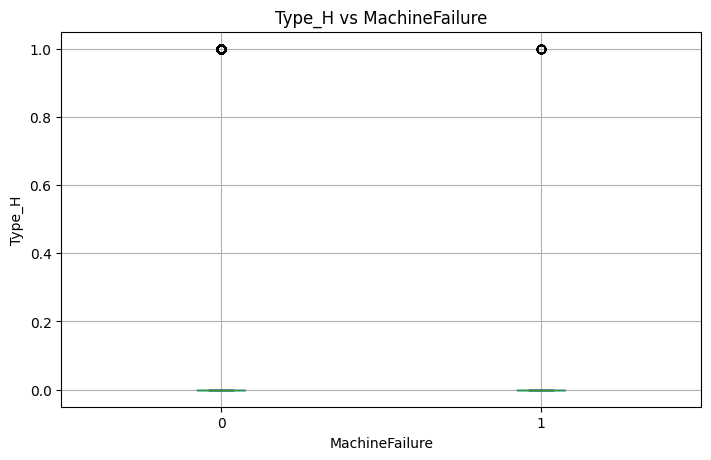

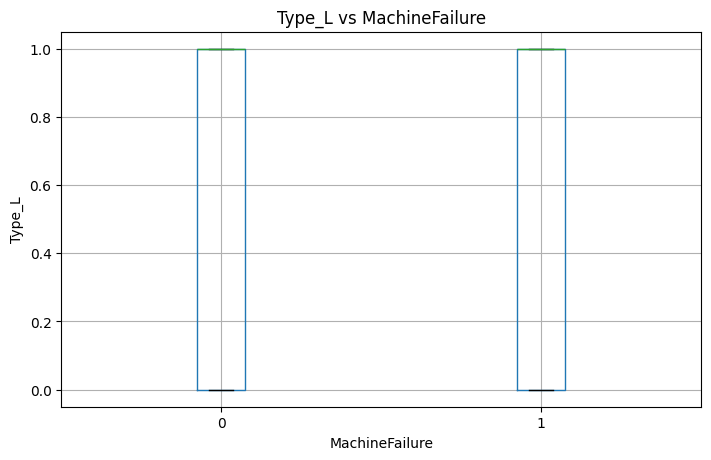

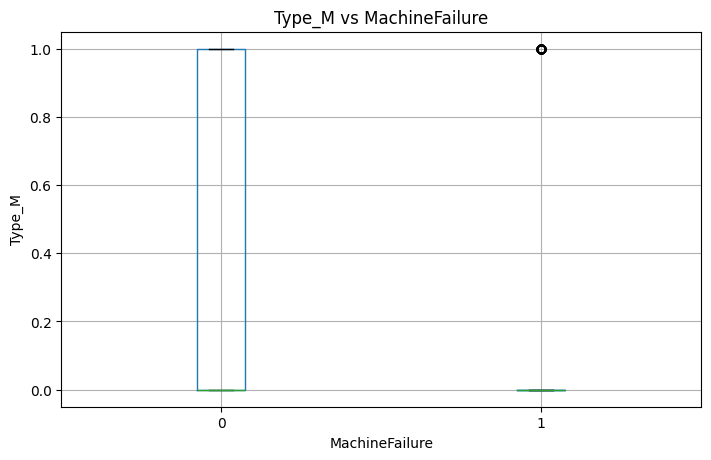

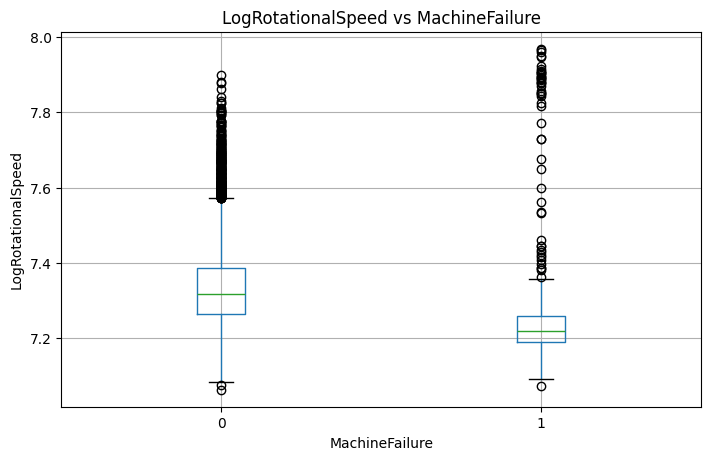

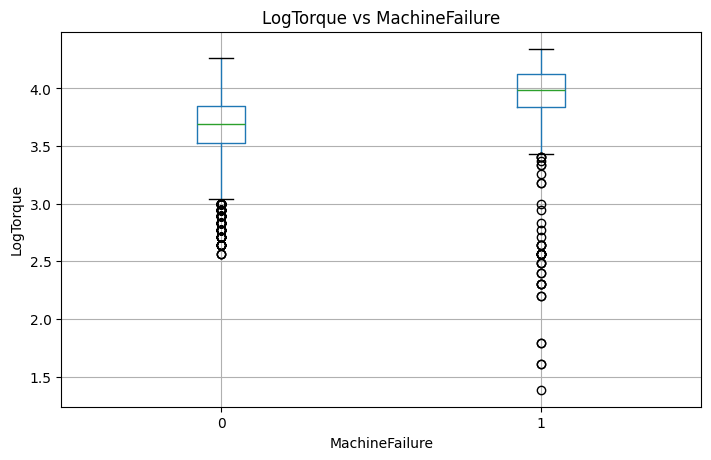

In [45]:
def plot_boxplot_numerical_vs_boolean(df, num_col, bool_col):
    df.boxplot(column=num_col, by=bool_col, figsize=(8,5))
    plt.title(f"{num_col} vs {bool_col}")
    plt.suptitle("")
    plt.xlabel(bool_col)
    plt.ylabel(num_col)
    plt.show()

numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('MachineFailure')

for feature in numerical_cols:
    plot_boxplot_numerical_vs_boolean(data, feature, 'MachineFailure')

In [ ]:



ai4i2020_elman_rnn_h32_cv_scores = training(model=ElmanRNN(input_size=8, hidden_size=32, output_size=1),
         data=data,
         target_feature_name='ClosingPrice',
         model_name='elman',
         learning_rate=0.002,
         patience=10,
         num_epochs=100)